# COSC2671 Social Media and Network Analytics

## Workshop 4

Jeffrey Chan, RMIT University, 2023

In [1]:
# import the ReddditProcess class python script that are based on the RedditProcessing class python script,
#  but also add additional funcitons
from RedditProcess import RedditProcess

# importing packages and nltk data libraries
import string
import json
import codecs
import re

import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

from colorama import Fore, Back, Style
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/siriuslam/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Vader based approach to sentiment analysis.

In [2]:
def vaderPrintTokens(lTokens, dSentimentScores):
    """
    Print out the tokens and sentiment score.
    
    @param lTokens: List of tokens to print and colour.
    @dSentimentScores: Dictionary of sentiment from Vader.

    """
    print(*lTokens, sep=', ')
    for cat,score in dSentimentScores.items():
        print('{0}: {1}, '.format(cat, score), end='')
    print()

In [3]:
def vaderSentimentAnalysis(sTweetsFilename, bPrint, redditProcessor):
    """
    Use Vader lexicons instead of a raw positive and negative word count.

    @param sTweetsFilename: name of input file containing a json formated tweet dump
    @param bPrint: whether to print the stream of tokens and sentiment.  Uses colorama to highlight sentiment words.
    @param redditProcessor: TweetProcessing object, used to pre-process each tweet.

    @returns: list of tweets, in the format of [date, sentiment]
    """

    # this is the vader sentiment analyser, part of nltk
    sentAnalyser = SentimentIntensityAnalyzer()

    vSentiment = []
    # open file and process tweets, one by one
    with open(sTweetsFilename, 'r') as f:
        redditDump = json.load(f)

        # process reddit submissions - title and content
        for submission in redditDump['submissions']:
            postText = submission['title']
            postDate = submission['created']
            
            # pre-process the post text
            lTokens = redditProcessor.process(postText)

            # this computes the sentiment scores (called polarity score in nltk, but mean same thing essentially)
            # see workshop sheet for what dSentimentScores holds
            dSentimentScores = sentAnalyser.polarity_scores(postText)

            # save the date and sentiment of each post (used for time series)
            vSentiment.append([pd.to_datetime(postDate, unit='s'), 
                               dSentimentScores['neg'], 
                               dSentimentScores['neu'], 
                               dSentimentScores['pos'], 
                               dSentimentScores['compound']])

            # if we are printing, we print the tokens then the sentiment scores.  Because we don't have the list
            # of positive and negative words, we cannot use colorama to label each token
            if bPrint:
                vaderPrintTokens(lTokens, dSentimentScores)

        for submission in redditDump['submissions']:
            postText = submission['content'] # For submission's content
            postDate = submission['created']
            lTokens = redditProcessor.process(postText)
            dSentimentScores = sentAnalyser.polarity_scores(postText)
            vSentiment.append([pd.to_datetime(postDate, unit='s'), 
                               dSentimentScores['neg'], 
                               dSentimentScores['neu'], 
                               dSentimentScores['pos'], 
                               dSentimentScores['compound']])
            if bPrint:
                vaderPrintTokens(lTokens, dSentimentScores) 
                
                
            # process the comments
            for comment in submission['comments']:
                postText = comment['text']
                postDate = comment['created']
                lTokens = redditProcessor.process(postText)
                dSentimentScores = sentAnalyser.polarity_scores(postText)
                vSentiment.append([pd.to_datetime(postDate, unit='s'), 
                                   dSentimentScores['neg'], 
                                   dSentimentScores['neu'], 
                                   dSentimentScores['pos'], 
                                   dSentimentScores['compound']])
                if bPrint:
                    vaderPrintTokens(lTokens, dSentimentScores)

                # process the replies
                if 'replies' in comment:
                    for reply in comment['replies']:
                        postText = reply['text']
                        postDate = reply['created']
                        lTokens = redditProcessor.process(postText)
                        dSentimentScores = sentAnalyser.polarity_scores(postText)
                        vSentiment.append([pd.to_datetime(postDate, unit='s'), 
                                           dSentimentScores['neg'], 
                                           dSentimentScores['neu'], 
                                           dSentimentScores['pos'], 
                                           dSentimentScores['compound']])
                        if bPrint:
                            vaderPrintTokens(lTokens, dSentimentScores) 
                    
                    
    return vSentiment

Arguments for this notebook
Modify as needed if you want to do similar analaysis for other purposes

In [4]:
# input file of set of reddit posts (json format)
redditFile = 'reddit_posts_maleficent.json'
# flag to determine whether to print out tweets and their sentiment
flagPrint = True


Then following calls the functions we have written above. First do the pre-processing, then calls the functions to do the sentiment analysis.

In [5]:
# Construct the reddit pro-processing object
# Use tweet tokenizer
tweetTokenizer = TweetTokenizer()

# Build punctuation list and stopwords list
lPunct = list(string.punctuation)
# # standard 'English' stopwords plus we want to remove things like 'rt' (retweet) etc
lStopwords = stopwords.words('english') + lPunct + ['rt', 'via', '...', '…', '"', "'", '`', '’','@']

# Create a stemmer instance
stemmer = PorterStemmer()

# Call the RedditProcess class python script
redditProcessor = RedditProcess(tweetTokenizer, lStopwords, stemmer)


### Reference: Codes above are from COSC2671 Social Media and Network Analytics Workshop 4, created by Jeffrey Chan, RMIT University, 2023.


## Compute Sentiment by Vader Model

In [6]:
vaderSentiment = []
vaderSentiment = vaderSentimentAnalysis(redditFile, flagPrint, redditProcessor)

disney', malefic, becom, first, non-superhero, movi, reach, million, worldwid
neg: 0.0, neu: 0.922, pos: 0.078, compound: 0.0258, 
malefic, took, worldwid, robert, stromberg, never, direct, anoth, theatric, featur
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
cruella, pleas, like, malefic, actual, show, movi, villain, villain, thing
neg: 0.363, neu: 0.541, pos: 0.096, compound: -0.7514, 
malefic, art, spent, hour, paint, horn, similar, movi, alter, last, minut
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
get, anoth, malefic, evil, misunderstood
neg: 0.0, neu: 0.74, pos: 0.26, compound: 0.5448, 
march, box, offic, recap, anoth, terribl, weekend, snow, white, flop, aw, million, worldwid, million, budget, meanwhil, alto, knight, also, flop, million, domest
neg: 0.156, neu: 0.844, pos: 0.0, compound: -0.7269, 
ursula, narrowli, win, mostli, well-lik, antagonist, antagonist, controversi, pleas, read, rule, descript
neg: 0.338, neu: 0.413, pos: 0.248, compound: -0.2924, 
attempt, watch, mov

In [7]:
print(len(vaderSentiment))

10341


# Sentiment plot for Vader Approach 

/var/folders/jv/6r6lx6cn5cs2bvq_5zljg07r0000gn/T/ipykernel_80214/3001089950.py:10: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  nVaderSeries = vaderSeries.resample('1y').mean() # score ranging from -1 (negative) to +1 (positive), so apply mean()


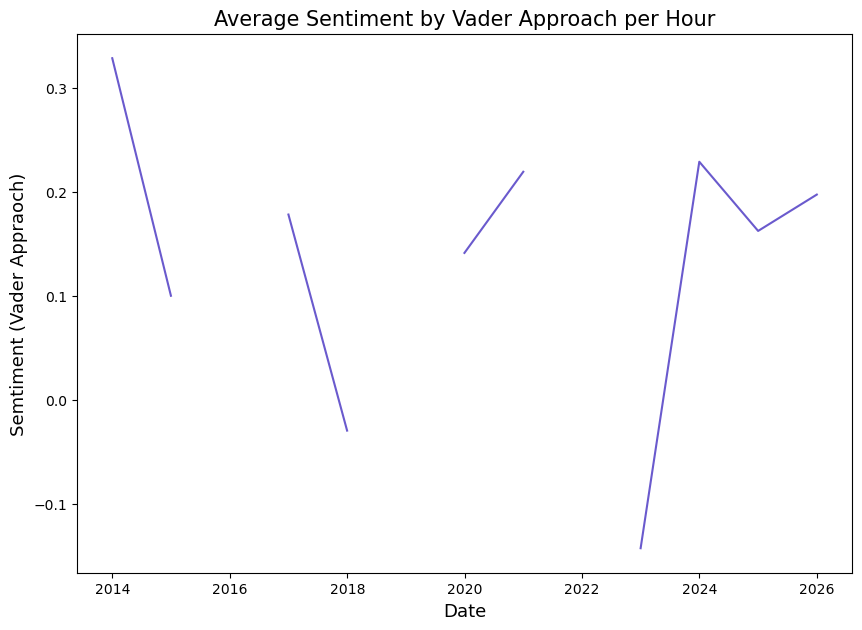

In [8]:
# Get it into a pandas data frame structure 
vaderSeries = pd.DataFrame(vaderSentiment, columns=['date', 'neg', 'neu', 'pos', 'compound'])

# Tell pandas that the column is the one we use for indexing (or x-axis)
vaderSeries.set_index('date', inplace=True)

# Set the compound coulumn to floats
vaderSeries[['compound']] = vaderSeries[['compound']].apply(pd.to_numeric)

nVaderSeries = vaderSeries.resample('1y').mean() # score ranging from -1 (negative) to +1 (positive), so apply mean()

# Plot overall compound sentiment
plt.figure(figsize=(10, 7))
plt.plot(nVaderSeries['compound'], color='slateblue') 
plt.title("Average Sentiment by Vader Approach per Hour",fontsize=15)
plt.ylabel("Semtiment (Vader Appraoch)",fontsize=13)
plt.xlabel("Date", fontsize=13)
plt.show()


In [9]:
# Total no. of overall Positive, Neutral and Negative in vaderSeries
pos_count = (vaderSeries['compound'] > 0).sum()
neu_count = (vaderSeries['compound'] == 0).sum()
neg_count = (vaderSeries['compound'] < 0).sum()

VaderCount = {
    'Positive': pos_count,
    'Neutral': neu_count,
    'Negative': neg_count
}
VaderCount

{'Positive': 5301, 'Neutral': 2137, 'Negative': 2903}

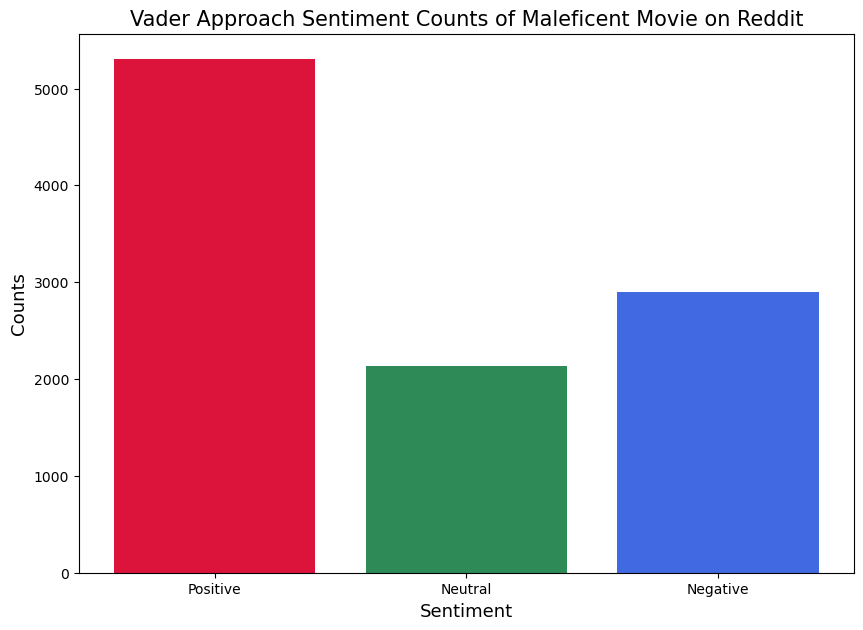

Average Sentiment Score of Maleficent Movie on Reddit:  0.14804019920703992


In [10]:
# Plot the overall sentiment counts
plt.figure(figsize=(10, 7))
plt.bar(VaderCount.keys(), VaderCount.values(), color=['crimson', 'seagreen', 'royalblue'])
plt.title("Vader Approach Sentiment Counts of Maleficent Movie on Reddit",fontsize=15)
plt.ylabel("Counts",fontsize=13)
plt.xlabel("Sentiment", fontsize=13)
plt.show()


# calculate the average sentiment score
average_sentiment = vaderSeries['compound'].mean()
print("Average Sentiment Score of Maleficent Movie on Reddit: ", average_sentiment)

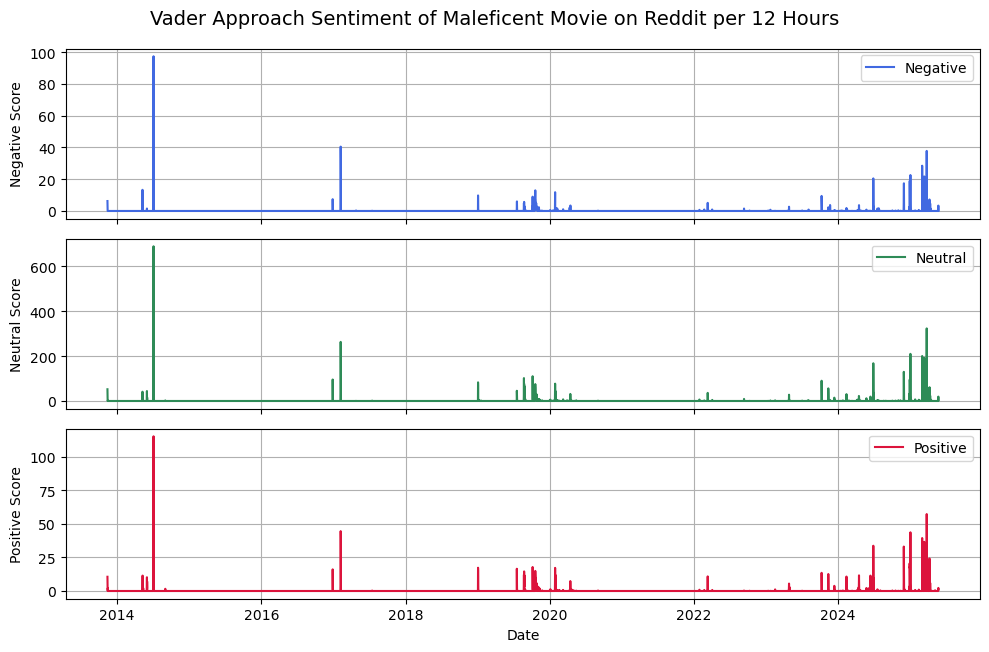

In [ ]:
nVaderSeries = vaderSeries.resample('12h').sum()

# Create a figure and a set of subplots (3 rows, 1 column)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6), sharex=True)
fig.suptitle('Vader Approach Sentiment of Maleficent Movie on Reddit per 12 Hours', fontsize=14)

# Plot: Negative Score
axes[0].plot(nVaderSeries['neg'], color='royalblue', label='Negative')
axes[0].set_ylabel('Negative Score')
axes[0].legend()
axes[0].grid(True)

# Plot: Neutral Score
axes[1].plot(nVaderSeries['neu'], color='seagreen', label='Neutral')
axes[1].set_ylabel('Neutral Score')
axes[1].legend()
axes[1].grid(True)

# Plot: Positive Score
axes[2].plot(nVaderSeries['pos'], color='crimson', label='Positive')
axes[2].set_ylabel('Positive Score')
axes[2].legend()
axes[2].grid(True)
axes[2].set_xlabel('Date')

plt.tight_layout(rect=[0, -0.1, 1, 1])
plt.show()